In [1]:
# faiss搜索相似图片并显示
# 1.从文件中加载faiss索引
# 2.从文件中加载文件名列表
# 3.挑选一些测试图片
# 4.提取测试图片的特征
# 5.搜索相似图片
# 6.显示相似图片

In [2]:
# 导入相关包
import cv2
import numpy as np
import matplotlib.pyplot as plt
import faiss

In [3]:
# 从文件中加载faiss索引
index = faiss.read_index('./VOCdevkit/voc.index')

In [5]:
# 查看索引大小
index.ntotal

17125

In [7]:
# 从文件中加载文件名列表
name_list = np.load('./VOCdevkit/name_list.npy')

In [8]:
len(name_list)

17125

In [9]:
name_list[0]

'2007_000027'

In [10]:
# 加载自定义特征提取类
from feature_extract import FeatureExtract
# 实例化
feat = FeatureExtract()

In [11]:
# 挑选一张测试图片
test_img = './images/test (10).jpg'

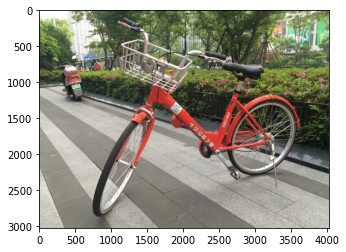

In [13]:
# plt显示
img = cv2.imread(test_img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [14]:
# 提取特征
feat_test = feat.extractFeat(test_img)

In [16]:
# 扩张维度
feat_test = np.expand_dims(feat_test, axis=0)   

In [18]:
feat_test.shape

(1, 512)

In [19]:
# faiss搜索前16张相似图片
k = 16
D, I = index.search(feat_test, k)

In [23]:
I[0]

array([ 7752,  9704, 12936, 11530,  5274,  5029,   820,  5320,  8584,
        7738,  6354,  6052,  5855,  2868,  6168,  3724], dtype=int64)

In [31]:
# 匹配name_list中的图片
select_file_list = name_list[I[0]]

In [34]:
# plt显示16张图
fig = plt.Figure(figsize=(10, 10))
for i,file_name in enumerate(select_file_list):
    # 组装文件名
    file_name = './VOCdevkit/VOC2012/JPEGImages/' + file_name + '.jpg'
    # 加载图片
    img = cv2.imread(file_name)
    # plt显示
    plt.subplot(4, 4, i+1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
plt.show()

2009_005178
2010_003799
2011_003169
2011_000412
2009_000344
2008_008629
2008_000133
2009_000445
2010_001540
2009_005154
2009_002438
2009_001840
2009_001456
2008_004280
2009_002087
2008_005982
